In [5]:
# this is the library we will explore
import geopandas as gpd 

#will use for making map 
import matplotlib.pyplot as plt

## Data 

We will use simplified data about wild pig (Sus scrofa) sightings in CA. Data is from Global Biodiversity 

Read in the shapefile using 'geopandas' function 'gpd.read_file()' : 

In [57]:
pigs = gpd.read_file('~/EDS220/eds220-week4/data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')
california = gpd.read_file('~/EDS220/eds220-week4/data/ca-boundary/ca-boundary.shp')
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## Geoseries and GeoData Frame 

Core data structure of GeoPandas is `geopandas.GeoDataFrame` 
    `geopandas.GeoDataFrame` = think of it as a a `pandas.DataFram` with a dedicated geometry column. 
    
    The **geometry column ** in a `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. This column is og type `geopandas.GeoSeries`. 
    The other non-geometry columns in the geodataframe are our usual `pd.Series` type. 

In [21]:
# type of pigs dataframe 
print(type(pigs))

#type of geometry column
print(type(pigs.geometry))

#type of the gbifID column 
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [23]:
#check data type of columns. 
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

### geometric information 

Two other important attributes of a `gpd.GeoDataFrame` are uts coordinate reference system (CRS) and its extent. 

Think of the CRS as instructions to locate each feature on the surface of the Earth. 

In [25]:
# access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [27]:
#Suppose we only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

# use sort_index() method to order the index
pigs.year.value_counts().sort_index() ##value counts counts how many times non-NA values appear. 



1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

Similarly to a pd.DataFrame, a gpd.GeoDataFrame has a plot() method that we can call directly to create a quick view of our data. The geospatial information of the gpd.GeoDataFrame will be used to create the axes of the plot.

<AxesSubplot:>

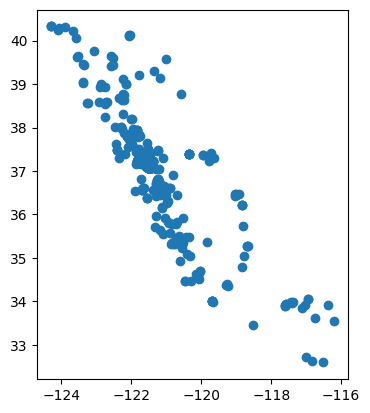

In [29]:
pigs_recent.plot()

In [28]:
#We can use our usual data selection to get data from 2020 onwards:

# selet data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print length of original dataframe
print(len(pigs))

# check length of new dataframe
len(pigs_recent)

1046


606

Going forward, we will often want to make more complex visualizations where we add different layers to a graph and customize it. To do this we will use the matplotlib Python library for creating visualizations. We can interact with matplotlib via its pyplot interface, which we imported at the top of the notebook as

In [32]:
# import matplotlib with standard abbreviation
import matplotlib.pyplot as plt


Matplotlib graphs the data in a figure which can have one or more axes. The axis is only the area specified by the x-y axis and what is plotted in it. To create a new blank figure:

Initialize a new figure and axes by calling pyplot’s subplots() function, and
show the graph using plt.show():

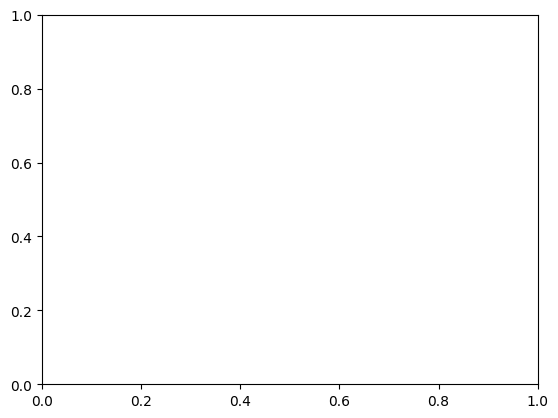

In [36]:
# create a blank figure (fig) with an empty axis (ax)
fig, ax = plt.subplots() # this returns two different things: the figure in fig, and the axis in ax. 

# display figure
plt.show()


## adding a layer 

When using `matplotlib` it can be useful to think of creating a plot, as adding layers to an axis. 

The general syntax to plot a dataframe `df` onto an axis is: 
```
# create new figure and axis
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax=ax, 
        ...)   # other arguments for plot function

# display figure
plt.show()
```

<function matplotlib.pyplot.show(close=None, block=None)>

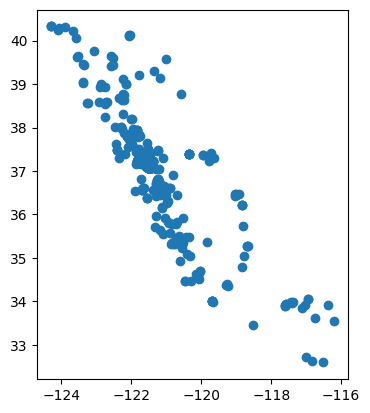

In [39]:
# create new figure and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# display figure
plt.show

 Customization
Matplotlib allows for a lot of customization. Some of it can be done directly in the plot() method for the dataframe (like we’ve done when ploting data using pandas), while other is done by updating attributes of the axis ax. The following image shows some examples of elements in the axis that can be updated.

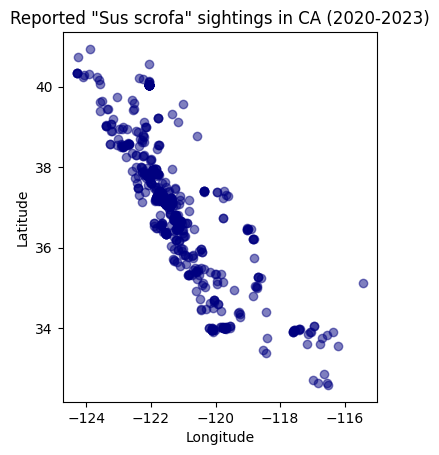

In [49]:
#Some basic customization for our pigs data could looke like this:

# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
california.plot(ax=ax,
                 alpha=0.5,
                 color='navy'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


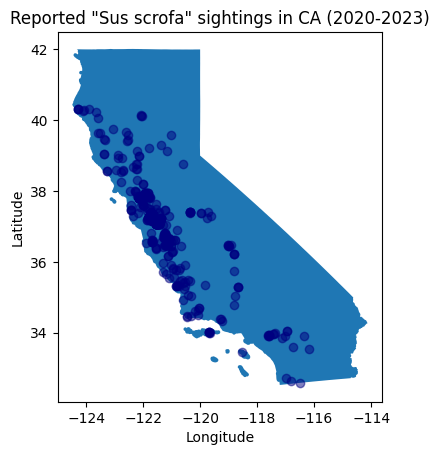

In [58]:
#Some basic customization for our pigs data could looke like this:

# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
california.plot(ax=ax)

pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='navy'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()